<a href="https://colab.research.google.com/github/shivanibaskar/myprojects/blob/master/lenet_5(fire_vs_safe_%20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers,losses,preprocessing
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path="/gdrive/My Drive/fire/fire_dataset"
test_path="/gdrive/My Drive/fire/test"



In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [ ]:
trainimages=train_image_generator.flow_from_directory(train_path,target_size=(256,256),class_mode="binary",classes=["fire","safe"],color_mode="grayscale")
validationimages=validation_image_generator.flow_from_directory(test_path,target_size=(256,256),class_mode="binary",classes=["fire","safe"],color_mode="grayscale")


Found 960 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(6,(5,5),input_shape=(256,256,1),strides=(1,1),activation="tanh",padding="same"))
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(16,(5,5),activation="tanh"))
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(120,activation="tanh"))
model.add(layers.Dense(84,activation="tanh"))
model.add(layers.Dense(2,activation="sigmoid"))
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 6)       156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 128, 128, 6)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 16)      2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               7380600   
_________________________________________________________________
dense_9 (Dense)              (None, 84)               

In [ ]:
import datetime
# Place the logs in a timestamped subdirectory
# This allows to easy select different training runs
# In order not to overwrite some data, it is useful to have a name with a timestamp
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Specify the callback object
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# tf.keras.callback.TensorBoard ensures that logs are created and stored
# We need to pass callback object to the fit method
# The way to do this is by passing the list of callback objects, which is in our case just one

In [ ]:
history = model.fit_generator(
    trainimages,
    steps_per_epoch=20,
    epochs=10,validation_data=validationimages)


Epoch 1/10
20/20 [==============================] - 211s 11s/step - loss: 0.7173 - accuracy: 0.7437 - val_loss: 0.6934 - val_accuracy: 0.4872
Epoch 2/10
20/20 [==============================] - 88s 4s/step - loss: 0.6867 - accuracy: 0.7672 - val_loss: 0.6937 - val_accuracy: 0.4872
Epoch 3/10
20/20 [==============================] - 57s 3s/step - loss: 0.6819 - accuracy: 0.7641 - val_loss: 0.6942 - val_accuracy: 0.4872
Epoch 4/10
20/20 [==============================] - 50s 2s/step - loss: 0.6773 - accuracy: 0.7625 - val_loss: 0.6947 - val_accuracy: 0.4872
Epoch 5/10
20/20 [==============================] - 47s 2s/step - loss: 0.6720 - accuracy: 0.7719 - val_loss: 0.6953 - val_accuracy: 0.4872
Epoch 6/10
20/20 [==============================] - 46s 2s/step - loss: 0.6676 - accuracy: 0.7703 - val_loss: 0.6960 - val_accuracy: 0.4872
Epoch 7/10
20/20 [==============================] - 46s 2s/step - loss: 0.6644 - accuracy: 0.7594 - val_loss: 0.6968 - val_accuracy: 0.4872
Epoch 8/10
20/20 [

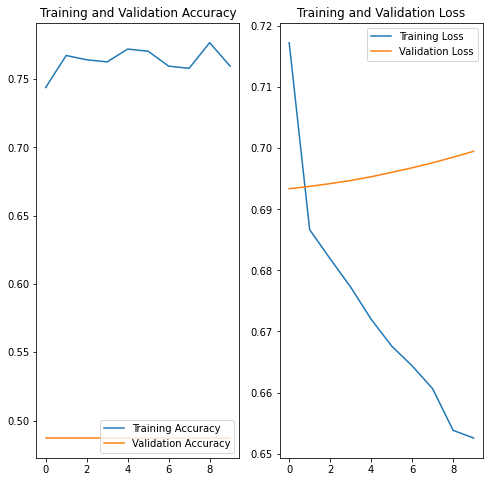

In [68]:
epochs=10
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
